### 1. Install required libraries

In [1]:
# install.packages("remotes")
# remotes::install_github("zdk123/SpiecEasi")
# if (!requireNamespace("BiocManager", quietly = TRUE))
#    install.packages("BiocManager")
# install.packages("GGally")

### 2. Load required libraries

In [1]:
library(phyloseq)
library(SpiecEasi)
library(igraph)
library(intergraph)
library(network)
library(GGally)


Attaching package: ‘igraph’


The following object is masked from ‘package:SpiecEasi’:

    make_graph


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union



‘network’ 1.17.1 (2021-06-12), part of the Statnet Project
* ‘news(package="network")’ for changes since last version
* ‘citation("network")’ for citation information
* ‘https://statnet.org’ for help, support, and other information



Attaching package: ‘network’


The following objects are masked from ‘package:igraph’:

    %c%, %s%, add.edges, add.vertices, delete.edges, delete.vertices,
    get.edge.attribute, get.edges, get.vertex.attribute, is.bipartite,
    is.directed, list.edge.attributes, list.vertex.attributes,
    set.edge.attribute, set.vertex.attribute


Loading required package: ggplot2

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



### 3. Load R objects from diversity analyses

In [3]:
load("../02-diversity_analyses/.RData")
# OR load data from current folder
# load(".RData")

### 4. ASV interaction network

#### 4a. First subset phyloseq object into different tooth type / HIV status groups

In [4]:
ps.dat.noUS <- subset_samples(ps.dat, study_group != "US")
# subset phyloseq object into different groups
## HI CF-PF
ps.dat.HI.CFPF <- subset_samples(ps.dat.noUS, study_group == "HI" & aliquot_type == "CF-PF")
# filter low abundance taxa to simplify network building step (seen at least 3 times in 10% of samples)
ps.dat.HI.CFPF <- filter_taxa(ps.dat.HI.CFPF, function(x) sum(x > 3) > (0.10*length(x)), TRUE)
                              
## HI CA-PD                              
ps.dat.HI.CAPD <- subset_samples(ps.dat.noUS, study_group == "HI" & aliquot_type == "CA-PD")
# filter low abundance taxa to simplify network building step (seen at least 3 times in 10% of samples)
ps.dat.HI.CAPD <- filter_taxa(ps.dat.HI.CAPD , function(x) sum(x > 3) > (0.10*length(x)), TRUE)
                              
## HUU CF-PF                              
ps.dat.HUU.CFPF <- subset_samples(ps.dat.noUS, study_group == "HUU" & aliquot_type == "CF-PF")
# filter low abundance taxa to simplify network building step (seen at least 3 times in 10% of samples)
ps.dat.HUU.CFPF <- filter_taxa(ps.dat.HUU.CFPF, function(x) sum(x > 3) > (0.10*length(x)), TRUE)
                               
## HUU CA-PD                               
ps.dat.HUU.CAPD <- subset_samples(ps.dat.noUS, study_group == "HUU" & aliquot_type == "CA-PD")
# filter low abundance taxa to simplify network building step (seen at least 3 times in 10% of samples)
ps.dat.HUU.CAPD <- filter_taxa(ps.dat.HUU.CAPD, function(x) sum(x > 3) > (0.10*length(x)), TRUE)
                               
## HEU CF-PF                               
ps.dat.HEU.CFPF <- subset_samples(ps.dat.noUS, study_group == "HEU" & aliquot_type == "CF-PF")
# filter low abundance taxa to simplify network building step (seen at least 3 times in 10% of samples)
ps.dat.HEU.CFPF <- filter_taxa(ps.dat.HEU.CFPF, function(x) sum(x > 3) > (0.10*length(x)), TRUE)
                               
## HEU CA-PD                               
ps.dat.HEU.CAPD <- subset_samples(ps.dat.noUS, study_group == "HEU" & aliquot_type == "CA-PD")
# filter low abundance taxa to simplify network building step (seen at least 3 times in 10% of samples)
ps.dat.HEU.CAPD <- filter_taxa(ps.dat.HEU.CAPD, function(x) sum(x > 3) > (0.10*length(x)), TRUE)
                               
## HI CA-PE                               
ps.dat.HI.CAPE <- subset_samples(ps.dat.noUS, study_group == "HI" & aliquot_type == "CA-PE")
# filter low abundance taxa to simplify network building step (seen at least 3 times in 10% of samples)
ps.dat.HI.CAPE <- filter_taxa(ps.dat.HI.CAPE, function(x) sum(x > 3) > (0.10*length(x)), TRUE)

## HUU CA-PE                              
ps.dat.HUU.CAPE <- subset_samples(ps.dat.noUS, study_group == "HUU" & aliquot_type == "CA-PE")
# filter low abundance taxa to simplify network building step (seen at least 3 times in 10% of samples)
ps.dat.HUU.CAPE <- filter_taxa(ps.dat.HUU.CAPE, function(x) sum(x > 3) > (0.10*length(x)), TRUE)

#### 4b. HI CF-PF network

Applying data transformations...

Selecting model with pulsar using stars...

Fitting final estimate with mb...

done



[1] "Total number of ASVs in graph:  143"

png 
  2

[1] "number of positive connections:  96"

[1] "number of negative connections:  6"

[1] "total number of connections:  102"

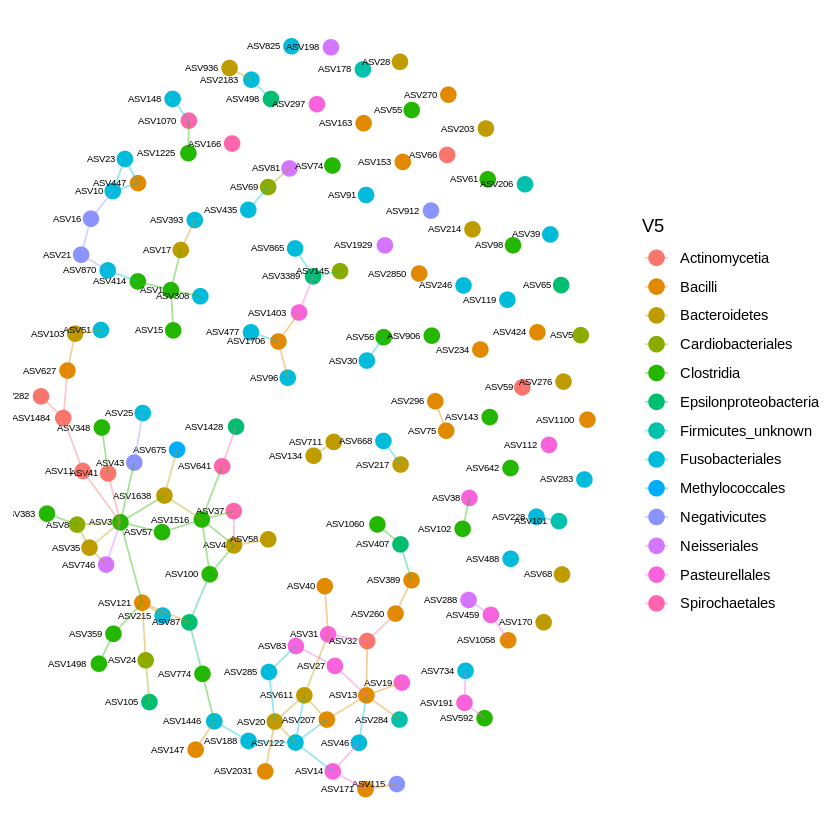

In [5]:
# make image folder
system("mkdir img")
spiec.out <- spiec.easi(ps.dat.HI.CFPF, method="mb", lambda.min.ratio=1e-2, nlambda=20, pulsar.params=list(rep.num=100))
spiec.graph <- adj2igraph(getRefit(spiec.out), vertex.attr=list(name=taxa_names(ps.dat.HI.CFPF)))
paste("Total number of ASVs in graph: ", length(taxa_names(ps.dat.HI.CFPF)))
# save network
grph <- plot_network(spiec.graph, ps.dat.HI.CFPF, type='taxa', color="V5")
grph
pdf("img/network.HI.CFPF.pdf")
grph
dev.off()
#how many positive and negative edges inferred from network?
betaMat <- as.matrix(symBeta(getOptBeta(spiec.out)))
positive <- length(betaMat[betaMat>0])/2
paste("number of positive connections: ", positive)
negative <- length(betaMat[betaMat<0])/2
paste("number of negative connections: ", negative)
total <- length(betaMat[betaMat!=0])/2
paste("total number of connections: ", total)

Visualize network with positive and negative edges

png 
  2

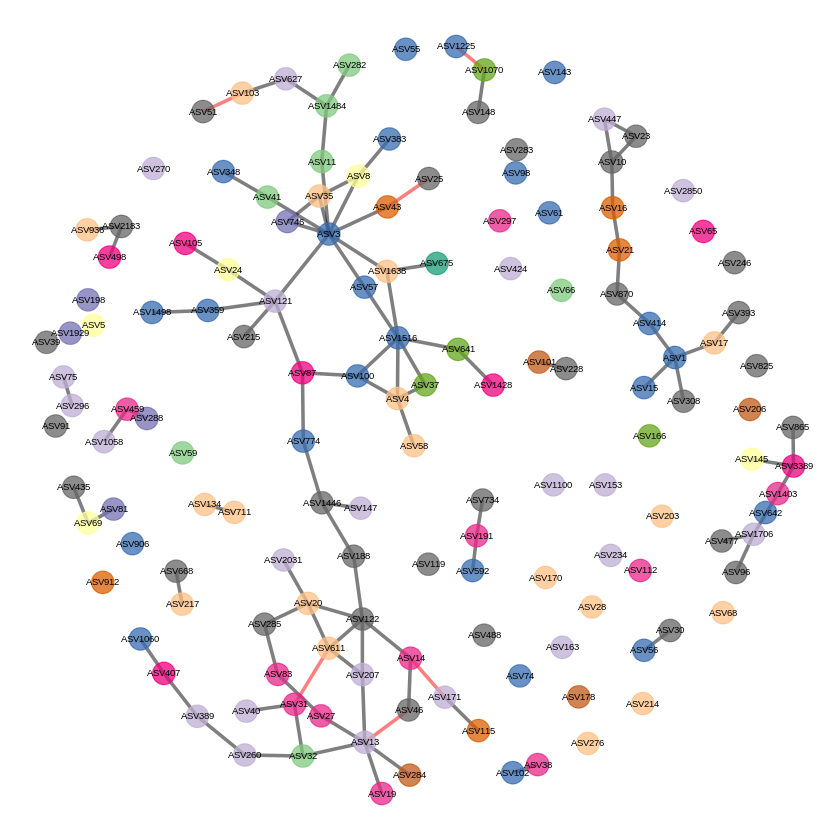

In [6]:
getrank <- "V5"
# Col vector up to 74 color samples
col_vector74 = c("#7FC97F","#BEAED4","#FDC086","#FFFF99","#386CB0","#F0027F","#BF5B17","#666666","#1B9E77","#D95F02","#7570B3","#E7298A","#66A61E","#E6AB02","#A6761D","#666666","#A6CEE3","#1F78B4","#B2DF8A","#33A02C","#FB9A99","#E31A1C","#FDBF6F","#FF7F00","#CAB2D6","#6A3D9A","#FFFF99","#B15928","#FBB4AE","#B3CDE3","#CCEBC5","#DECBE4","#FED9A6","#FFFFCC","#E5D8BD","#FDDAEC","#F2F2F2","#B3E2CD","#FDCDAC","#CBD5E8","#F4CAE4","#E6F5C9","#FFF2AE","#F1E2CC","#CCCCCC","#E41A1C","#377EB8","#4DAF4A","#984EA3","#FF7F00","#FFFF33","#A65628","#F781BF","#999999","#66C2A5","#FC8D62","#8DA0CB","#E78AC3","#A6D854","#FFD92F","#E5C494","#B3B3B3","#8DD3C7","#FFFFB3","#BEBADA","#FB8072","#80B1D3","#FDB462","#B3DE69","#FCCDE5","#D9D9D9","#BC80BD","#CCEBC5","#FFED6F")
asv.ids <- colnames(spiec.out[[1]]$data)
edges <- E(spiec.graph)
edge_cols <- ifelse(betaMat>0, 'black', 'red')[upper.tri(betaMat) & betaMat!=0]
E(spiec.graph)$color <- edge_cols

#How many nodes connected at specific rank
nb_nodes <- vcount(spiec.graph)
tax_table(ps.dat) <- tax_table(ps.dat)[,getrank]
asv_ids <- V(spiec.graph)$name
idx <- which(row.names(tax_table(ps.dat)) %in% asv_ids)
taxa <- as.character(tax_table(ps.dat)[,getrank])[idx]
ig2 <- asNetwork(spiec.graph)
network.vertex.names(ig2) <- taxa
net <- ig2
net %v% getrank <- as.character(taxa)
y <- col_vector74[1:nb_nodes]
names(y) <- levels(as.factor(taxa))

#Plot the network
grph <- ggnet2(net, color = getrank, alpha=0.75, palette = y, size = 6, edge.size=1, edge.color="color", edge.alpha = 0.5, label = asv_ids, label.size = 2) +theme(legend.position = "none")
grph
pdf("img/network.HI.CFPF_posneg.pdf")
grph
dev.off()

#write spiec-easi graph to file 
write.graph(spiec.graph, file="spieceasi.ncol.HI.CFPF.txt", format="ncol")

K-core decomposition

In [7]:
# which ASVs are the core of the network 
which(coreness(spiec.graph)>=2)

ASV8   ASV87   ASV37  ASV100   ASV10   ASV23  ASV285 ASV1446  ASV188   ASV46 
      3       7      15      16      30      34      36      45      46      47 
 ASV122  ASV207  ASV447  ASV121   ASV13  ASV774    ASV3 ASV1516   ASV57   ASV32 
     48      53      54      64      67      74      87      88      89     104 
 ASV746   ASV83   ASV31   ASV14   ASV27   ASV35   ASV20  ASV611    ASV4 ASV1638 
    111     116     120     122     123     125     131     136     138     143

In [8]:
# periphery of the network
which(coreness(spiec.graph)==0)

ASV5   ASV65  ASV166   ASV74   ASV61  ASV825  ASV119   ASV39   ASV91  ASV488 
      5       6      14      17      18      21      25      27      38      42 
 ASV283  ASV246 ASV1100  ASV163  ASV234  ASV153  ASV424  ASV270 ASV2850  ASV906 
     43      44      52      57      58      60      63      65      70      71 
 ASV178  ASV206   ASV98   ASV55  ASV143  ASV642  ASV912   ASV66   ASV59  ASV198 
     79      80      81      85      91      92      98     106     107     108 
ASV1929  ASV297  ASV112  ASV276  ASV214  ASV170  ASV203   ASV68   ASV28 
    112     114     117     129     130     134     135     140     141

Eigenvector centrality

In [9]:
# measure of being well connected to the well connected -- influence of a node in a network - high eigenvector score means that a node is connected to many nodes who themselves have high scores
tail(sort(igraph::eigen_centrality(spiec.graph)$vector), 10)
# save graph
spiec.graph.HICFPF <- spiec.graph

ASV11      ASV4     ASV57    ASV746    ASV121   ASV1638      ASV8   ASV1516 
0.3044380 0.3064036 0.4177174 0.4202641 0.4461196 0.4523480 0.4551059 0.5096925 
    ASV35      ASV3 
0.5188968 1.0000000

#### 4c. HUU CF-PF network

Applying data transformations...

Selecting model with pulsar using stars...

Fitting final estimate with mb...

done



[1] "Total number of ASVs in graph:  164"

png 
  2

[1] "number of positive connections:  181"

[1] "number of negative connections:  8"

[1] "total number of connections:  189"

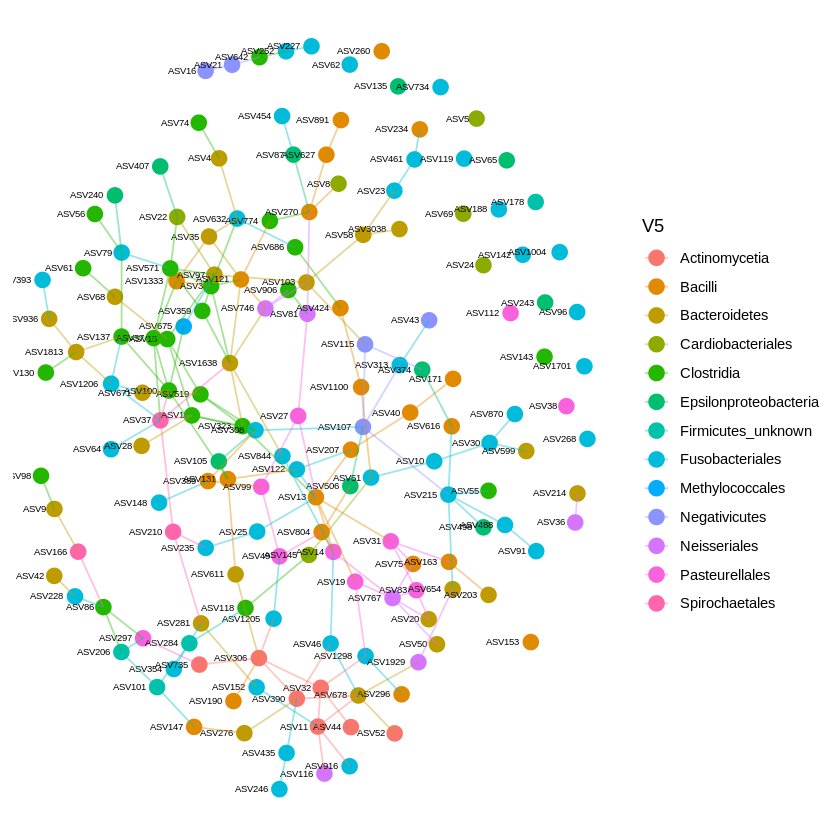

In [10]:
spiec.out <- spiec.easi(ps.dat.HUU.CFPF, method="mb", lambda.min.ratio=1e-2, nlambda=20, pulsar.params=list(rep.num=100))
spiec.graph <- adj2igraph(getRefit(spiec.out), vertex.attr=list(name=taxa_names(ps.dat.HUU.CFPF)))
paste("Total number of ASVs in graph: ", length(taxa_names(ps.dat.HUU.CFPF)))
# save network
grph <- plot_network(spiec.graph, ps.dat.HUU.CFPF, type='taxa', color="V5")
grph
pdf("img/network.HUU.CFPF.pdf")
grph
dev.off()
#how many positive and negative edges inferred from network?
betaMat <- as.matrix(symBeta(getOptBeta(spiec.out)))
positive <- length(betaMat[betaMat>0])/2
paste("number of positive connections: ", positive)
negative <- length(betaMat[betaMat<0])/2
paste("number of negative connections: ", negative)
total <- length(betaMat[betaMat!=0])/2
paste("total number of connections: ", total)

Visualize network with positive and negative edges

png 
  2

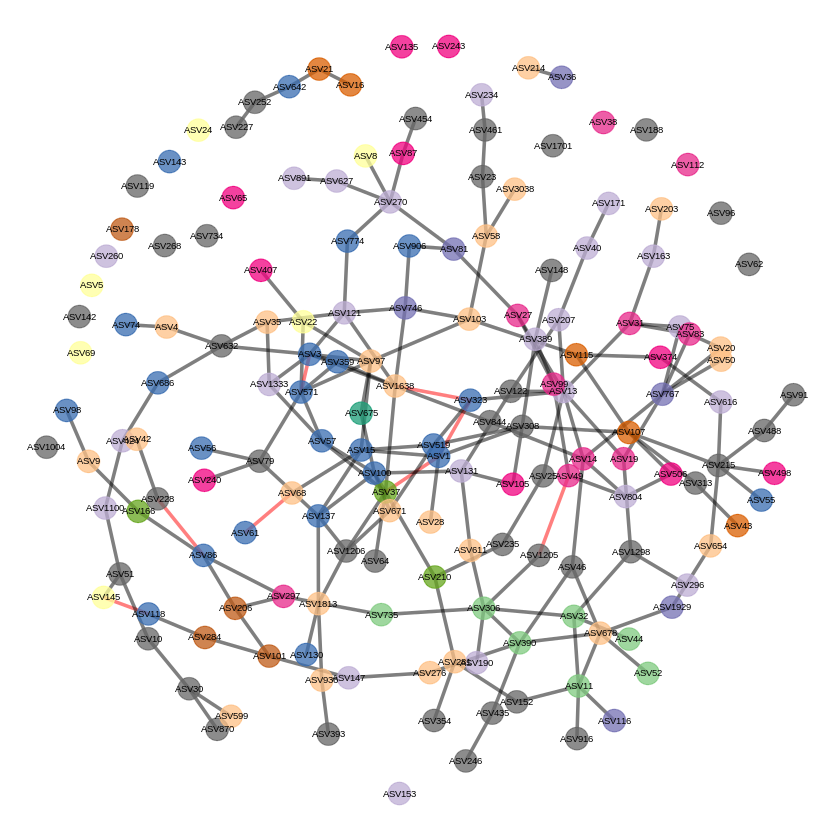

In [11]:
asv.ids <- colnames(spiec.out[[1]]$data)
edges <- E(spiec.graph)
edge_cols <- ifelse(betaMat>0, 'black', 'red')[upper.tri(betaMat) & betaMat!=0]
E(spiec.graph)$color <- edge_cols

#How many nodes connected at specific rank
nb_nodes <- vcount(spiec.graph)
tax_table(ps.dat) <- tax_table(ps.dat)[,getrank]
asv_ids <- V(spiec.graph)$name
idx <- which(row.names(tax_table(ps.dat)) %in% asv_ids)
taxa <- as.character(tax_table(ps.dat)[,getrank])[idx]
ig2 <- asNetwork(spiec.graph)
network.vertex.names(ig2) <- taxa
net <- ig2
net %v% getrank <- as.character(taxa)
y <- col_vector74[1:nb_nodes]
names(y) <- levels(as.factor(taxa))

#Plot the network
grph <- ggnet2(net, color = getrank, alpha=0.75, palette = y, size = 6, edge.size=1, edge.color="color", edge.alpha = 0.5, label = asv_ids, label.size = 2) +theme(legend.position = "none")
grph
pdf("img/network.HUU.CFPF_posneg.pdf")
grph
dev.off()

#write spiec-easi graph to file 
write.graph(spiec.graph, file="spieceasi.ncol.HUU.CFPF.txt", format="ncol")

K-core decomposition

In [12]:
# which ASVs are the core of the network 
which(coreness(spiec.graph)>=2)

ASV145   ASV22  ASV506  ASV105  ASV374  ASV210   ASV37 ASV1333  ASV137  ASV571 
      2       6       8      10      15      18      19      20      21      22 
 ASV100  ASV323  ASV519  ASV152   ASV79   ASV51   ASV25 ASV1298 ASV1205  ASV215 
     23      24      25      35      40      42      45      48      49      51 
 ASV308 ASV1206  ASV235  ASV844   ASV46  ASV122  ASV632  ASV389 ASV1100  ASV207 
     52      54      63      64      68      69      70      72      74      75 
 ASV804   ASV75  ASV131  ASV147  ASV424  ASV121  ASV270  ASV616   ASV13  ASV906 
     76      78      82      86      87      88      89      90      91      93 
 ASV774  ASV101  ASV284  ASV206   ASV86  ASV118  ASV686    ASV3   ASV57    ASV1 
     94      95      96      98     100     101     102     105     106     107 
 ASV359  ASV115  ASV107   ASV15   ASV32   ASV11  ASV735  ASV390  ASV306  ASV767 
    110     114     115     116     117     119     121     122     123     124 
  ASV81  ASV746 ASV1929  ASV297   ASV83   ASV19   ASV31   ASV14   ASV49   ASV27 
    127     128     129     130     131     134     135     136     137     138 
  ASV99  ASV675   ASV35  ASV276   ASV20  ASV678  ASV103   ASV97  ASV281  ASV611 
    139     140     141     143     145     146     147     148     150     152 
 ASV671 ASV1813  ASV654 ASV1638 
    157     158     160     164

In [13]:
# periphery of the network
which(coreness(spiec.graph)==0)

ASV69   ASV24    ASV5   ASV65  ASV135  ASV243  ASV734  ASV142  ASV119 ASV1004 
      1       4       5       7      12      13      29      33      36      38 
ASV1701   ASV62   ASV96  ASV268  ASV188  ASV153  ASV260  ASV178  ASV143  ASV112 
     39      41      58      62      67      85      92      97     108     132 
  ASV38 
    133

Eigenvector centrality

In [14]:
tail(sort(igraph::eigen_centrality(spiec.graph)$vector), 10)
# save graph
spiec.graph.HUUCFPF <- spiec.graph

ASV15    ASV100     ASV57    ASV359    ASV121     ASV37     ASV97    ASV571 
0.4450517 0.5454526 0.5582131 0.6121564 0.6371656 0.7093523 0.7190643 0.8011219 
  ASV1638      ASV3 
0.9158725 1.0000000

#### 4d. HEU CF-PF network

Applying data transformations...

Selecting model with pulsar using stars...

Fitting final estimate with mb...

done



[1] "Total number of ASVs in graph:  156"

png 
  2

[1] "number of positive connections:  106"

[1] "number of negative connections:  4"

[1] "total number of connections:  110"

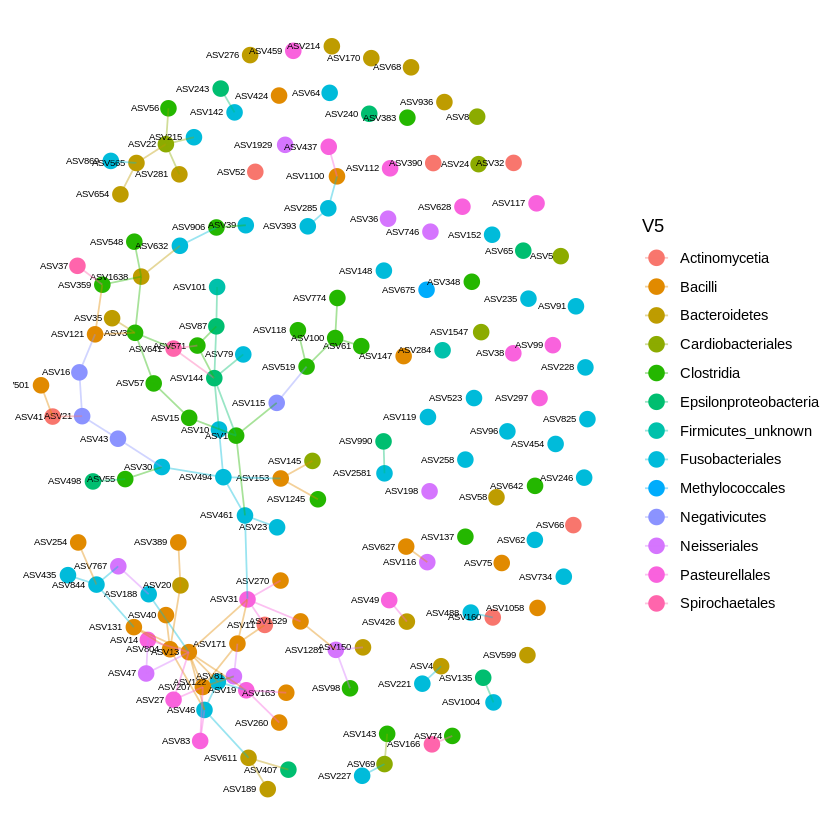

In [15]:
spiec.out <- spiec.easi(ps.dat.HEU.CFPF, method="mb", lambda.min.ratio=1e-2, nlambda=20, pulsar.params=list(rep.num=100))
spiec.graph <- adj2igraph(getRefit(spiec.out), vertex.attr=list(name=taxa_names(ps.dat.HEU.CFPF)))
paste("Total number of ASVs in graph: ", length(taxa_names(ps.dat.HEU.CFPF)))
# save network
grph <- plot_network(spiec.graph, ps.dat.HEU.CFPF, type='taxa', color="V5")
grph
pdf("img/network.HEU.CFPF.pdf")
grph
dev.off()
#how many positive and negative edges inferred from network?
betaMat <- as.matrix(symBeta(getOptBeta(spiec.out)))
positive <- length(betaMat[betaMat>0])/2
paste("number of positive connections: ", positive)
negative <- length(betaMat[betaMat<0])/2
paste("number of negative connections: ", negative)
total <- length(betaMat[betaMat!=0])/2
paste("total number of connections: ", total)

Visualize network with positive and negative edges

png 
  2

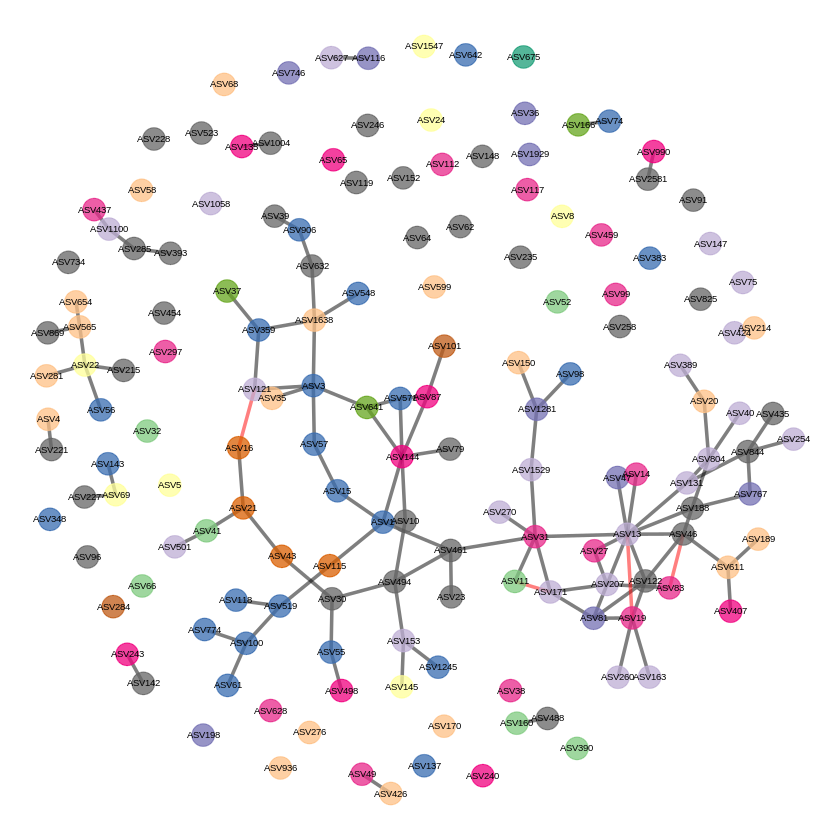

In [16]:
asv.ids <- colnames(spiec.out[[1]]$data)
edges <- E(spiec.graph)
edge_cols <- ifelse(betaMat>0, 'black', 'red')[upper.tri(betaMat) & betaMat!=0]
E(spiec.graph)$color <- edge_cols

#How many nodes connected at specific rank
nb_nodes <- vcount(spiec.graph)
tax_table(ps.dat) <- tax_table(ps.dat)[,getrank]
asv_ids <- V(spiec.graph)$name
idx <- which(row.names(tax_table(ps.dat)) %in% asv_ids)
taxa <- as.character(tax_table(ps.dat)[,getrank])[idx]
ig2 <- asNetwork(spiec.graph)
network.vertex.names(ig2) <- taxa
net <- ig2
net %v% getrank <- as.character(taxa)
y <- col_vector74[1:nb_nodes]
names(y) <- levels(as.factor(taxa))

#Plot the network
grph <- ggnet2(net, color = getrank, alpha=0.75, palette = y, size = 6, edge.size=1, edge.color="color", edge.alpha = 0.5, label = asv_ids, label.size = 2) +theme(legend.position = "none")
grph
pdf("img/network.HEU.CFPF_posneg.pdf")
grph
dev.off()

#write spiec-easi graph to file 
write.graph(spiec.graph, file="spieceasi.ncol.HEU.CFPF.txt", format="ncol")

K-core decomposition

In [17]:
# which ASVs are the core of the network 
which(coreness(spiec.graph)>=2)

ASV87  ASV144  ASV641  ASV571  ASV494  ASV461   ASV10   ASV30  ASV844  ASV188 
      9      15      17      21      40      41      42      43      56      60 
  ASV46  ASV122  ASV171  ASV207  ASV804  ASV131  ASV121   ASV13    ASV3   ASV57 
     61      62      65      67      68      74      81      83      97      98 
   ASV1  ASV359   ASV16   ASV21   ASV43   ASV15   ASV11  ASV767   ASV47   ASV81 
     99     102     103     104     105     107     112     115     119     120 
  ASV83   ASV19   ASV31   ASV14   ASV27 ASV1638 
    128     131     132     134     136     156

In [18]:
# periphery of the network
which(coreness(spiec.graph)==0)

ASV8   ASV24    ASV5 ASV1547   ASV65  ASV240  ASV137  ASV734  ASV228  ASV825 
      3       4       5       7       8      16      20      26      27      28 
 ASV152  ASV119  ASV148   ASV62   ASV91   ASV96  ASV454  ASV258  ASV235  ASV246 
     33      34      35      38      48      49      53      54      55      57 
  ASV64  ASV523   ASV75 ASV1058  ASV147  ASV424  ASV383  ASV284  ASV348  ASV642 
     58      59      70      78      79      80      87      89      94     101 
  ASV32   ASV52   ASV66  ASV390   ASV36  ASV198  ASV746 ASV1929  ASV628  ASV117 
    109     111     113     114     116     117     122     123     124     125 
 ASV297  ASV112   ASV38  ASV459   ASV99  ASV675  ASV936  ASV276  ASV214  ASV170 
    126     129     130     133     137     138     140     141     142     147 
 ASV599   ASV58   ASV68 
    152     154     155

Eigenvector centrality

In [19]:
tail(sort(igraph::eigen_centrality(spiec.graph)$vector), 10)
# save graph
spiec.graph.HEUCFPF <- spiec.graph

ASV131     ASV27    ASV171     ASV31     ASV81     ASV46     ASV19    ASV207 
0.3086188 0.3732333 0.4139391 0.4628563 0.5063898 0.5180755 0.5533244 0.5969495 
   ASV122     ASV13 
0.6024717 1.0000000

#### 4e. HI CA-PD network

Applying data transformations...

Selecting model with pulsar using stars...

Fitting final estimate with mb...

done



[1] "Total number of ASVs in graph:  168"

png 
  2

[1] "number of positive connections:  215"

[1] "number of negative connections:  2"

[1] "total number of connections:  217"

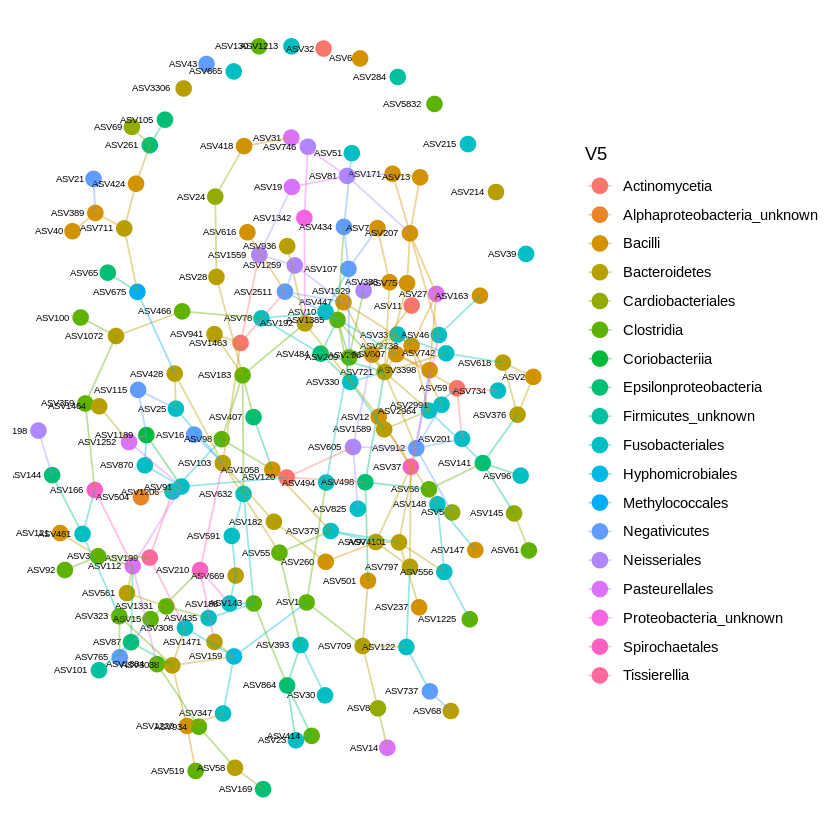

png 
  2

[1] "core network ASVs:  5"   "core network ASVs:  8"  
  [3] "core network ASVs:  10"  "core network ASVs:  11" 
  [5] "core network ASVs:  12"  "core network ASVs:  16" 
  [7] "core network ASVs:  17"  "core network ASVs:  18" 
  [9] "core network ASVs:  19"  "core network ASVs:  20" 
 [11] "core network ASVs:  21"  "core network ASVs:  23" 
 [13] "core network ASVs:  24"  "core network ASVs:  29" 
 [15] "core network ASVs:  32"  "core network ASVs:  33" 
 [17] "core network ASVs:  34"  "core network ASVs:  35" 
 [19] "core network ASVs:  36"  "core network ASVs:  37" 
 [21] "core network ASVs:  38"  "core network ASVs:  41" 
 [23] "core network ASVs:  42"  "core network ASVs:  43" 
 [25] "core network ASVs:  44"  "core network ASVs:  45" 
 [27] "core network ASVs:  46"  "core network ASVs:  48" 
 [29] "core network ASVs:  49"  "core network ASVs:  50" 
 [31] "core network ASVs:  52"  "core network ASVs:  53" 
 [33] "core network ASVs:  54"  "core network ASVs:  55" 
 [35] "core network ASVs:  56"  "core network ASVs:  58" 
 [37] "core network ASVs:  59"  "core network ASVs:  62" 
 [39] "core network ASVs:  63"  "core network ASVs:  64" 
 [41] "core network ASVs:  65"  "core network ASVs:  66" 
 [43] "core network ASVs:  67"  "core network ASVs:  68" 
 [45] "core network ASVs:  70"  "core network ASVs:  71" 
 [47] "core network ASVs:  72"  "core network ASVs:  74" 
 [49] "core network ASVs:  75"  "core network ASVs:  76" 
 [51] "core network ASVs:  77"  "core network ASVs:  78" 
 [53] "core network ASVs:  80"  "core network ASVs:  83" 
 [55] "core network ASVs:  84"  "core network ASVs:  85" 
 [57] "core network ASVs:  86"  "core network ASVs:  91" 
 [59] "core network ASVs:  92"  "core network ASVs:  93" 
 [61] "core network ASVs:  97"  "core network ASVs:  98" 
 [63] "core network ASVs:  99"  "core network ASVs:  100"
 [65] "core network ASVs:  101" "core network ASVs:  102"
 [67] "core network ASVs:  103" "core network ASVs:  104"
 [69] "core network ASVs:  106" "core network ASVs:  109"
 [71] "core network ASVs:  111" "core network ASVs:  112"
 [73] "core network ASVs:  113" "core network ASVs:  116"
 [75] "core network ASVs:  117" "core network ASVs:  118"
 [77] "core network ASVs:  119" "core network ASVs:  120"
 [79] "core network ASVs:  121" "core network ASVs:  122"
 [81] "core network ASVs:  123" "core network ASVs:  124"
 [83] "core network ASVs:  127" "core network ASVs:  128"
 [85] "core network ASVs:  129" "core network ASVs:  130"
 [87] "core network ASVs:  132" "core network ASVs:  133"
 [89] "core network ASVs:  136" "core network ASVs:  137"
 [91] "core network ASVs:  138" "core network ASVs:  139"
 [93] "core network ASVs:  141" "core network ASVs:  146"
 [95] "core network ASVs:  147" "core network ASVs:  148"
 [97] "core network ASVs:  149" "core network ASVs:  150"
 [99] "core network ASVs:  151" "core network ASVs:  152"
[101] "core network ASVs:  153" "core network ASVs:  154"
[103] "core network ASVs:  155" "core network ASVs:  156"
[105] "core network ASVs:  157" "core network ASVs:  160"
[107] "core network ASVs:  161" "core network ASVs:  164"
[109] "core network ASVs:  165" "core network ASVs:  166"
[111] "core network ASVs:  167" "core network ASVs:  168"

[1] "peripheral network ASVs:  27"  "peripheral network ASVs:  39" 
 [3] "peripheral network ASVs:  51"  "peripheral network ASVs:  57" 
 [5] "peripheral network ASVs:  60"  "peripheral network ASVs:  73" 
 [7] "peripheral network ASVs:  94"  "peripheral network ASVs:  96" 
 [9] "peripheral network ASVs:  110" "peripheral network ASVs:  125"
[11] "peripheral network ASVs:  145" "peripheral network ASVs:  162"

ASV385     ASV75    ASV807    ASV296   ASV2964    ASV912    ASV484    ASV330 
0.3200605 0.3277798 0.3499953 0.4085132 0.4088698 0.4417009 0.5080121 0.5175875 
  ASV1385    ASV721 
0.6034135 1.0000000

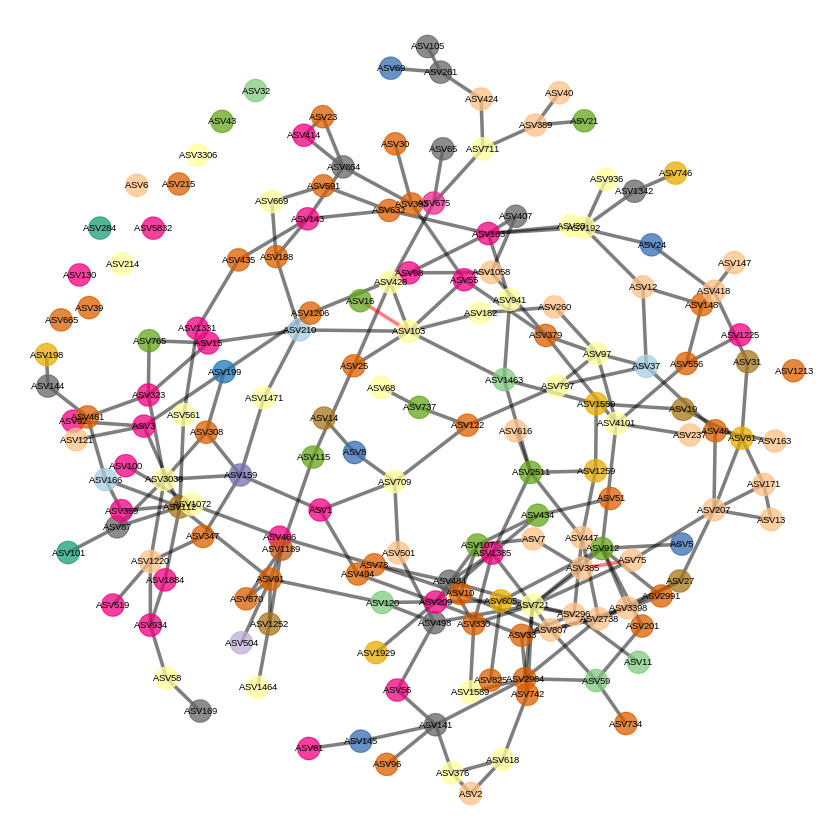

In [20]:
spiec.out <- spiec.easi(ps.dat.HI.CAPD, method="mb", lambda.min.ratio=1e-2, nlambda=20, pulsar.params=list(rep.num=100))
spiec.graph <- adj2igraph(getRefit(spiec.out), vertex.attr=list(name=taxa_names(ps.dat.HI.CAPD)))
paste("Total number of ASVs in graph: ", length(taxa_names(ps.dat.HI.CAPD)))
# save network
grph <- plot_network(spiec.graph, ps.dat.HI.CAPD, type='taxa', color="V5")
grph
pdf("img/network.HI.CAPD.pdf")
grph
dev.off()
#how many positive and negative edges inferred from network?
betaMat <- as.matrix(symBeta(getOptBeta(spiec.out)))
positive <- length(betaMat[betaMat>0])/2
paste("number of positive connections: ", positive)
negative <- length(betaMat[betaMat<0])/2
paste("number of negative connections: ", negative)
total <- length(betaMat[betaMat!=0])/2
paste("total number of connections: ", total)
# visualize network with pos and neg connections
asv.ids <- colnames(spiec.out[[1]]$data)
edges <- E(spiec.graph)
edge_cols <- ifelse(betaMat>0, 'black', 'red')[upper.tri(betaMat) & betaMat!=0]
E(spiec.graph)$color <- edge_cols

#How many nodes connected at specific rank
nb_nodes <- vcount(spiec.graph)
tax_table(ps.dat) <- tax_table(ps.dat)[,getrank]
asv_ids <- V(spiec.graph)$name
idx <- which(row.names(tax_table(ps.dat)) %in% asv_ids)
taxa <- as.character(tax_table(ps.dat)[,getrank])[idx]
ig2 <- asNetwork(spiec.graph)
network.vertex.names(ig2) <- taxa
net <- ig2
net %v% getrank <- as.character(taxa)
y <- col_vector74[1:nb_nodes]
names(y) <- levels(as.factor(taxa))

#Plot the network
grph <- ggnet2(net, color = getrank, alpha=0.75, palette = y, size = 6, edge.size=1, edge.color="color", edge.alpha = 0.5, label = asv_ids, label.size = 2) +theme(legend.position = "none")
grph
pdf("img/network.HI.CAPD_posneg.pdf")
grph
dev.off()

#write spiec-easi graph to file 
write.graph(spiec.graph, file="spieceasi.ncol.HI.CAPD.txt", format="ncol")

# kcore decomp
paste("core network ASVs: ", which(coreness(spiec.graph)>=2))
paste("peripheral network ASVs: ", which(coreness(spiec.graph)==0))

# eigenvalue centrality
tail(sort(igraph::eigen_centrality(spiec.graph)$vector), 10)
# save graph
spiec.graph.HICAPD <- spiec.graph

#### 4f. HUU CA-PD network

Applying data transformations...

Selecting model with pulsar using stars...

Fitting final estimate with mb...

done



[1] "Total number of ASVs in graph:  270"

png 
  2

[1] "number of positive connections:  761"

[1] "number of negative connections:  50"

[1] "total number of connections:  811"

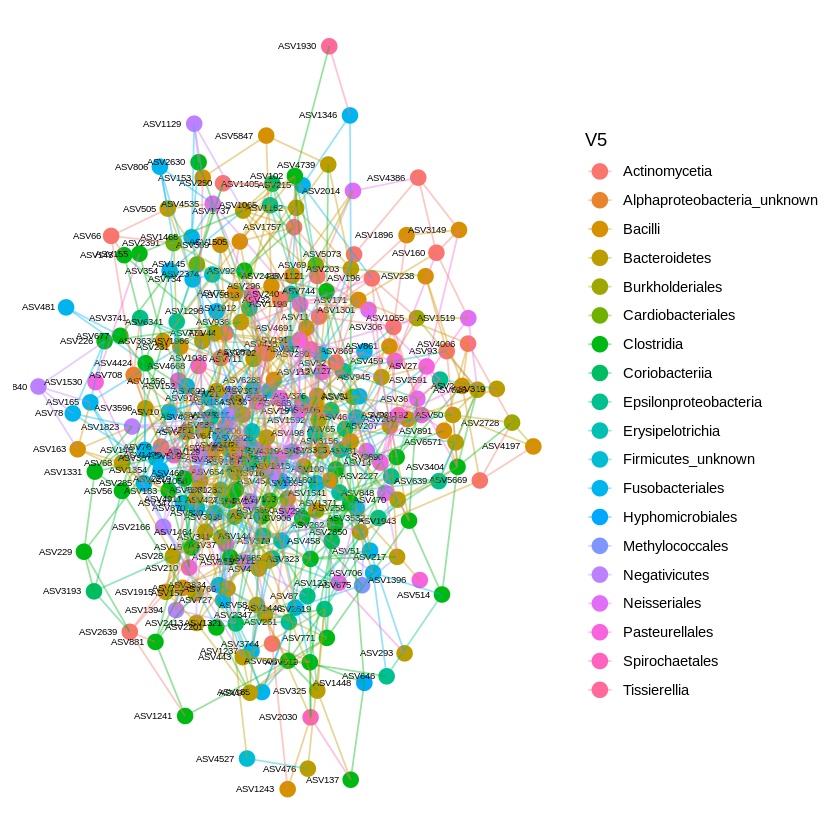

png 
  2

[1] "core network ASVs:  1"   "core network ASVs:  2"  
  [3] "core network ASVs:  3"   "core network ASVs:  4"  
  [5] "core network ASVs:  5"   "core network ASVs:  6"  
  [7] "core network ASVs:  7"   "core network ASVs:  8"  
  [9] "core network ASVs:  9"   "core network ASVs:  10" 
 [11] "core network ASVs:  11"  "core network ASVs:  12" 
 [13] "core network ASVs:  13"  "core network ASVs:  14" 
 [15] "core network ASVs:  15"  "core network ASVs:  16" 
 [17] "core network ASVs:  17"  "core network ASVs:  18" 
 [19] "core network ASVs:  19"  "core network ASVs:  20" 
 [21] "core network ASVs:  21"  "core network ASVs:  22" 
 [23] "core network ASVs:  23"  "core network ASVs:  24" 
 [25] "core network ASVs:  25"  "core network ASVs:  26" 
 [27] "core network ASVs:  27"  "core network ASVs:  28" 
 [29] "core network ASVs:  29"  "core network ASVs:  30" 
 [31] "core network ASVs:  31"  "core network ASVs:  32" 
 [33] "core network ASVs:  33"  "core network ASVs:  34" 
 [35] "core network ASVs:  35"  "core network ASVs:  36" 
 [37] "core network ASVs:  37"  "core network ASVs:  38" 
 [39] "core network ASVs:  39"  "core network ASVs:  40" 
 [41] "core network ASVs:  41"  "core network ASVs:  42" 
 [43] "core network ASVs:  43"  "core network ASVs:  44" 
 [45] "core network ASVs:  45"  "core network ASVs:  46" 
 [47] "core network ASVs:  47"  "core network ASVs:  48" 
 [49] "core network ASVs:  49"  "core network ASVs:  50" 
 [51] "core network ASVs:  51"  "core network ASVs:  52" 
 [53] "core network ASVs:  53"  "core network ASVs:  54" 
 [55] "core network ASVs:  55"  "core network ASVs:  56" 
 [57] "core network ASVs:  57"  "core network ASVs:  58" 
 [59] "core network ASVs:  59"  "core network ASVs:  60" 
 [61] "core network ASVs:  61"  "core network ASVs:  62" 
 [63] "core network ASVs:  63"  "core network ASVs:  64" 
 [65] "core network ASVs:  65"  "core network ASVs:  66" 
 [67] "core network ASVs:  67"  "core network ASVs:  68" 
 [69] "core network ASVs:  69"  "core network ASVs:  70" 
 [71] "core network ASVs:  71"  "core network ASVs:  72" 
 [73] "core network ASVs:  73"  "core network ASVs:  74" 
 [75] "core network ASVs:  75"  "core network ASVs:  76" 
 [77] "core network ASVs:  77"  "core network ASVs:  78" 
 [79] "core network ASVs:  79"  "core network ASVs:  80" 
 [81] "core network ASVs:  81"  "core network ASVs:  82" 
 [83] "core network ASVs:  83"  "core network ASVs:  84" 
 [85] "core network ASVs:  85"  "core network ASVs:  86" 
 [87] "core network ASVs:  87"  "core network ASVs:  88" 
 [89] "core network ASVs:  89"  "core network ASVs:  90" 
 [91] "core network ASVs:  91"  "core network ASVs:  92" 
 [93] "core network ASVs:  93"  "core network ASVs:  94" 
 [95] "core network ASVs:  95"  "core network ASVs:  96" 
 [97] "core network ASVs:  97"  "core network ASVs:  98" 
 [99] "core network ASVs:  99"  "core network ASVs:  100"
[101] "core network ASVs:  101" "core network ASVs:  102"
[103] "core network ASVs:  103" "core network ASVs:  104"
[105] "core network ASVs:  105" "core network ASVs:  106"
[107] "core network ASVs:  107" "core network ASVs:  108"
[109] "core network ASVs:  109" "core network ASVs:  110"
[111] "core network ASVs:  111" "core network ASVs:  112"
[113] "core network ASVs:  113" "core network ASVs:  114"
[115] "core network ASVs:  115" "core network ASVs:  116"
[117] "core network ASVs:  117" "core network ASVs:  118"
[119] "core network ASVs:  119" "core network ASVs:  120"
[121] "core network ASVs:  121" "core network ASVs:  122"
[123] "core network ASVs:  123" "core network ASVs:  124"
[125] "core network ASVs:  125" "core network ASVs:  126"
[127] "core network ASVs:  127" "core network ASVs:  128"
[129] "core network ASVs:  129" "core network ASVs:  130"
[131] "core network ASVs:  131" "core network ASVs:  132"
[133] "core network ASVs:  133" "core network ASVs:  134"
[135] "core network ASVs:  135" "core network ASVs:  136"
[137] "core network ASVs:  137" "core network ASVs:  138"


[1] "peripheral network ASVs:  "

ASV376     ASV38    ASV170    ASV498    ASV169    ASV820    ASV454    ASV393 
0.6089284 0.6094299 0.6416517 0.6598686 0.6768347 0.7403637 0.7613259 0.7855973 
  ASV2925    ASV702 
0.9771198 1.0000000

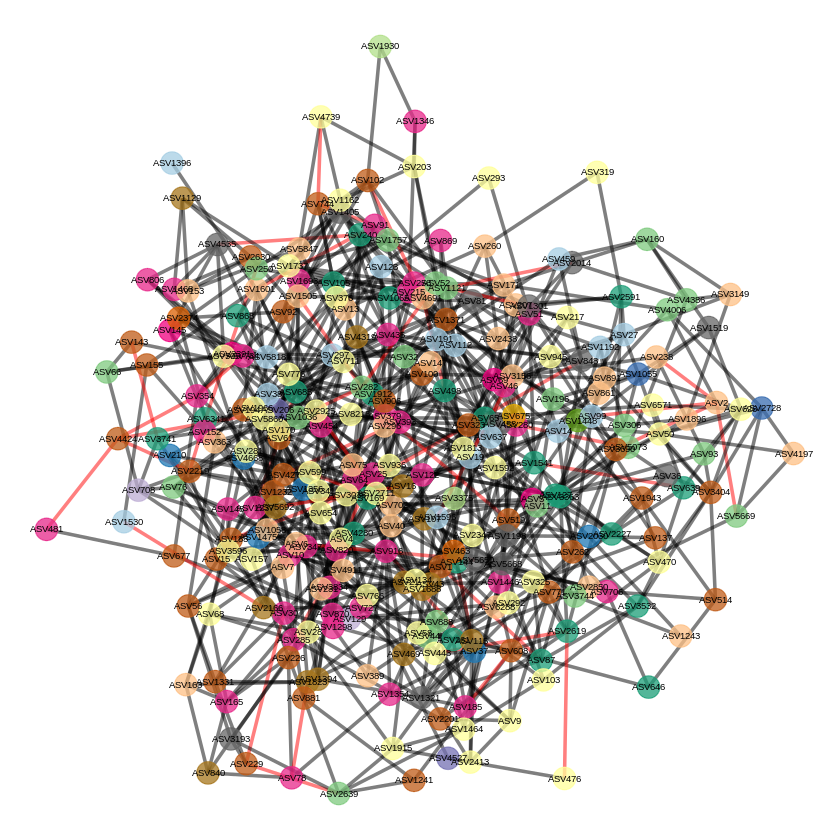

In [21]:
spiec.out <- spiec.easi(ps.dat.HUU.CAPD, method="mb", lambda.min.ratio=1e-2, nlambda=20, pulsar.params=list(rep.num=100))
spiec.graph <- adj2igraph(getRefit(spiec.out), vertex.attr=list(name=taxa_names(ps.dat.HUU.CAPD)))
paste("Total number of ASVs in graph: ", length(taxa_names(ps.dat.HUU.CAPD)))
# save network
grph <- plot_network(spiec.graph, ps.dat.HUU.CAPD, type='taxa', color="V5")
grph
pdf("img/network.HUU.CAPD.pdf")
grph
dev.off()
#how many positive and negative edges inferred from network?
betaMat <- as.matrix(symBeta(getOptBeta(spiec.out)))
positive <- length(betaMat[betaMat>0])/2
paste("number of positive connections: ", positive)
negative <- length(betaMat[betaMat<0])/2
paste("number of negative connections: ", negative)
total <- length(betaMat[betaMat!=0])/2
paste("total number of connections: ", total)
# visualize network with pos and neg connections
asv.ids <- colnames(spiec.out[[1]]$data)
edges <- E(spiec.graph)
edge_cols <- ifelse(betaMat>0, 'black', 'red')[upper.tri(betaMat) & betaMat!=0]
E(spiec.graph)$color <- edge_cols

#How many nodes connected at specific rank
nb_nodes <- vcount(spiec.graph)
tax_table(ps.dat) <- tax_table(ps.dat)[,getrank]
asv_ids <- V(spiec.graph)$name
idx <- which(row.names(tax_table(ps.dat)) %in% asv_ids)
taxa <- as.character(tax_table(ps.dat)[,getrank])[idx]
ig2 <- asNetwork(spiec.graph)
network.vertex.names(ig2) <- taxa
net <- ig2
net %v% getrank <- as.character(taxa)
y <- col_vector74[1:nb_nodes]
names(y) <- levels(as.factor(taxa))

#Plot the network
grph <- ggnet2(net, color = getrank, alpha=0.75, palette = y, size = 6, edge.size=1, edge.color="color", edge.alpha = 0.5, label = asv_ids, label.size = 2) +theme(legend.position = "none")
grph
pdf("img/network.HUU.CAPD_posneg.pdf")
grph
dev.off()

#write spiec-easi graph to file 
write.graph(spiec.graph, file="spieceasi.ncol.HUU.CAPD.txt", format="ncol")

# kcore decomp
paste("core network ASVs: ", which(coreness(spiec.graph)>=2))
paste("peripheral network ASVs: ", which(coreness(spiec.graph)==0))

# eigenvalue centrality
tail(sort(igraph::eigen_centrality(spiec.graph)$vector), 10)
# save graph
spiec.graph.HUUCAPD <- spiec.graph

#### 4g. HEU CA-PD network

Applying data transformations...

Selecting model with pulsar using stars...

Fitting final estimate with mb...

done



[1] "Total number of ASVs in graph:  408"

png 
  2

[1] "number of positive connections:  1829"

[1] "number of negative connections:  189"

[1] "total number of connections:  2018"

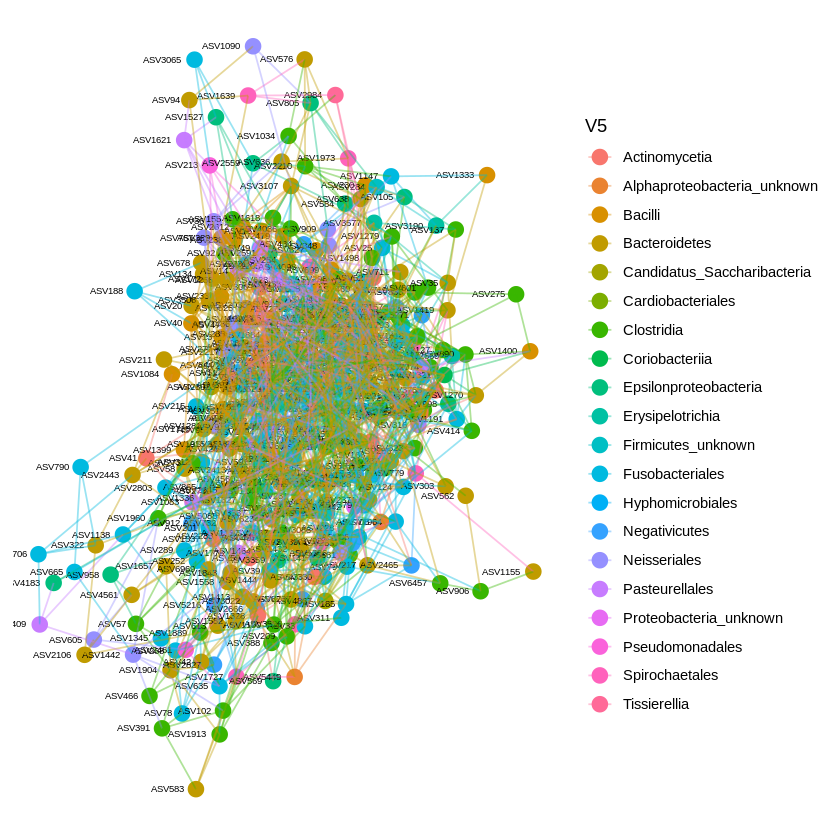

png 
  2

[1] "core network ASVs:  1"   "core network ASVs:  2"  
  [3] "core network ASVs:  3"   "core network ASVs:  4"  
  [5] "core network ASVs:  5"   "core network ASVs:  6"  
  [7] "core network ASVs:  7"   "core network ASVs:  8"  
  [9] "core network ASVs:  9"   "core network ASVs:  10" 
 [11] "core network ASVs:  11"  "core network ASVs:  12" 
 [13] "core network ASVs:  13"  "core network ASVs:  14" 
 [15] "core network ASVs:  15"  "core network ASVs:  16" 
 [17] "core network ASVs:  17"  "core network ASVs:  18" 
 [19] "core network ASVs:  19"  "core network ASVs:  20" 
 [21] "core network ASVs:  21"  "core network ASVs:  22" 
 [23] "core network ASVs:  23"  "core network ASVs:  24" 
 [25] "core network ASVs:  25"  "core network ASVs:  26" 
 [27] "core network ASVs:  27"  "core network ASVs:  28" 
 [29] "core network ASVs:  29"  "core network ASVs:  30" 
 [31] "core network ASVs:  31"  "core network ASVs:  32" 
 [33] "core network ASVs:  33"  "core network ASVs:  34" 
 [35] "core network ASVs:  35"  "core network ASVs:  36" 
 [37] "core network ASVs:  37"  "core network ASVs:  38" 
 [39] "core network ASVs:  39"  "core network ASVs:  40" 
 [41] "core network ASVs:  41"  "core network ASVs:  42" 
 [43] "core network ASVs:  43"  "core network ASVs:  44" 
 [45] "core network ASVs:  45"  "core network ASVs:  46" 
 [47] "core network ASVs:  47"  "core network ASVs:  48" 
 [49] "core network ASVs:  49"  "core network ASVs:  50" 
 [51] "core network ASVs:  51"  "core network ASVs:  52" 
 [53] "core network ASVs:  53"  "core network ASVs:  54" 
 [55] "core network ASVs:  55"  "core network ASVs:  56" 
 [57] "core network ASVs:  57"  "core network ASVs:  58" 
 [59] "core network ASVs:  59"  "core network ASVs:  60" 
 [61] "core network ASVs:  61"  "core network ASVs:  62" 
 [63] "core network ASVs:  63"  "core network ASVs:  64" 
 [65] "core network ASVs:  65"  "core network ASVs:  66" 
 [67] "core network ASVs:  67"  "core network ASVs:  68" 
 [69] "core network ASVs:  69"  "core network ASVs:  70" 
 [71] "core network ASVs:  71"  "core network ASVs:  72" 
 [73] "core network ASVs:  73"  "core network ASVs:  74" 
 [75] "core network ASVs:  75"  "core network ASVs:  76" 
 [77] "core network ASVs:  77"  "core network ASVs:  78" 
 [79] "core network ASVs:  79"  "core network ASVs:  80" 
 [81] "core network ASVs:  81"  "core network ASVs:  82" 
 [83] "core network ASVs:  83"  "core network ASVs:  84" 
 [85] "core network ASVs:  85"  "core network ASVs:  86" 
 [87] "core network ASVs:  87"  "core network ASVs:  88" 
 [89] "core network ASVs:  89"  "core network ASVs:  90" 
 [91] "core network ASVs:  91"  "core network ASVs:  92" 
 [93] "core network ASVs:  93"  "core network ASVs:  94" 
 [95] "core network ASVs:  95"  "core network ASVs:  96" 
 [97] "core network ASVs:  97"  "core network ASVs:  98" 
 [99] "core network ASVs:  99"  "core network ASVs:  100"
[101] "core network ASVs:  101" "core network ASVs:  102"
[103] "core network ASVs:  103" "core network ASVs:  104"
[105] "core network ASVs:  105" "core network ASVs:  106"
[107] "core network ASVs:  107" "core network ASVs:  108"
[109] "core network ASVs:  109" "core network ASVs:  110"
[111] "core network ASVs:  111" "core network ASVs:  112"
[113] "core network ASVs:  113" "core network ASVs:  114"
[115] "core network ASVs:  115" "core network ASVs:  116"
[117] "core network ASVs:  117" "core network ASVs:  118"
[119] "core network ASVs:  119" "core network ASVs:  120"
[121] "core network ASVs:  121" "core network ASVs:  122"
[123] "core network ASVs:  123" "core network ASVs:  124"
[125] "core network ASVs:  125" "core network ASVs:  126"
[127] "core network ASVs:  127" "core network ASVs:  128"
[129] "core network ASVs:  129" "core network ASVs:  130"
[131] "core network ASVs:  131" "core network ASVs:  132"
[133] "core network ASVs:  133" "core network ASVs:  134"
[135] "core network ASVs:  135" "core network ASVs:  136"
[137] "core network ASVs:  137" "core network ASVs:  138"


[1] "peripheral network ASVs:  "

ASV460     ASV98   ASV1110   ASV1705   ASV2533    ASV260     ASV70    ASV129 
0.7400350 0.7464070 0.7572475 0.7736393 0.7786600 0.7800640 0.7850719 0.8572371 
   ASV162    ASV374 
0.8841665 1.0000000

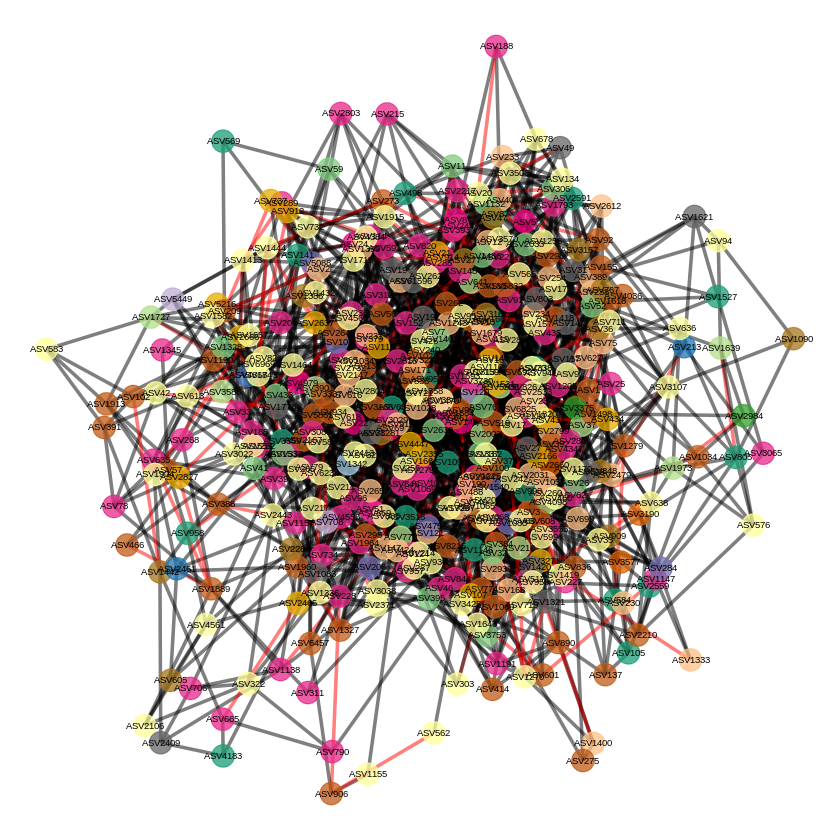

In [22]:
spiec.out <- spiec.easi(ps.dat.HEU.CAPD, method="mb", lambda.min.ratio=1e-2, nlambda=20, pulsar.params=list(rep.num=100))
spiec.graph <- adj2igraph(getRefit(spiec.out), vertex.attr=list(name=taxa_names(ps.dat.HEU.CAPD)))
paste("Total number of ASVs in graph: ", length(taxa_names(ps.dat.HEU.CAPD)))
# save network
grph <- plot_network(spiec.graph, ps.dat.HEU.CAPD, type='taxa', color="V5")
grph
pdf("img/network.HEU.CAPD.pdf")
grph
dev.off()
#how many positive and negative edges inferred from network?
betaMat <- as.matrix(symBeta(getOptBeta(spiec.out)))
positive <- length(betaMat[betaMat>0])/2
paste("number of positive connections: ", positive)
negative <- length(betaMat[betaMat<0])/2
paste("number of negative connections: ", negative)
total <- length(betaMat[betaMat!=0])/2
paste("total number of connections: ", total)
# visualize network with pos and neg connections
asv.ids <- colnames(spiec.out[[1]]$data)
edges <- E(spiec.graph)
edge_cols <- ifelse(betaMat>0, 'black', 'red')[upper.tri(betaMat) & betaMat!=0]
E(spiec.graph)$color <- edge_cols

#How many nodes connected at specific rank
nb_nodes <- vcount(spiec.graph)
tax_table(ps.dat) <- tax_table(ps.dat)[,getrank]
asv_ids <- V(spiec.graph)$name
idx <- which(row.names(tax_table(ps.dat)) %in% asv_ids)
taxa <- as.character(tax_table(ps.dat)[,getrank])[idx]
ig2 <- asNetwork(spiec.graph)
network.vertex.names(ig2) <- taxa
net <- ig2
net %v% getrank <- as.character(taxa)
y <- col_vector74[1:nb_nodes]
names(y) <- levels(as.factor(taxa))

#Plot the network
grph <- ggnet2(net, color = getrank, alpha=0.75, palette = y, size = 6, edge.size=1, edge.color="color", edge.alpha = 0.5, label = asv_ids, label.size = 2) +theme(legend.position = "none")
grph
pdf("img/network.HEU.CAPD_posneg.pdf")
grph
dev.off()

#write spiec-easi graph to file 
write.graph(spiec.graph, file="spieceasi.ncol.HEU.CAPD.txt", format="ncol")

# kcore decomp
paste("core network ASVs: ", which(coreness(spiec.graph)>=2))
paste("peripheral network ASVs: ", which(coreness(spiec.graph)==0))

# eigenvalue centrality
tail(sort(igraph::eigen_centrality(spiec.graph)$vector), 10)
# save graph
spiec.graph.HEUCAPD <- spiec.graph

#### 4g. HI CA-PE

Applying data transformations...

Selecting model with pulsar using stars...

Fitting final estimate with mb...

done



[1] "Total number of ASVs in graph:  270"

png 
  2

[1] "number of positive connections:  771"

[1] "number of negative connections:  41"

[1] "total number of connections:  812"

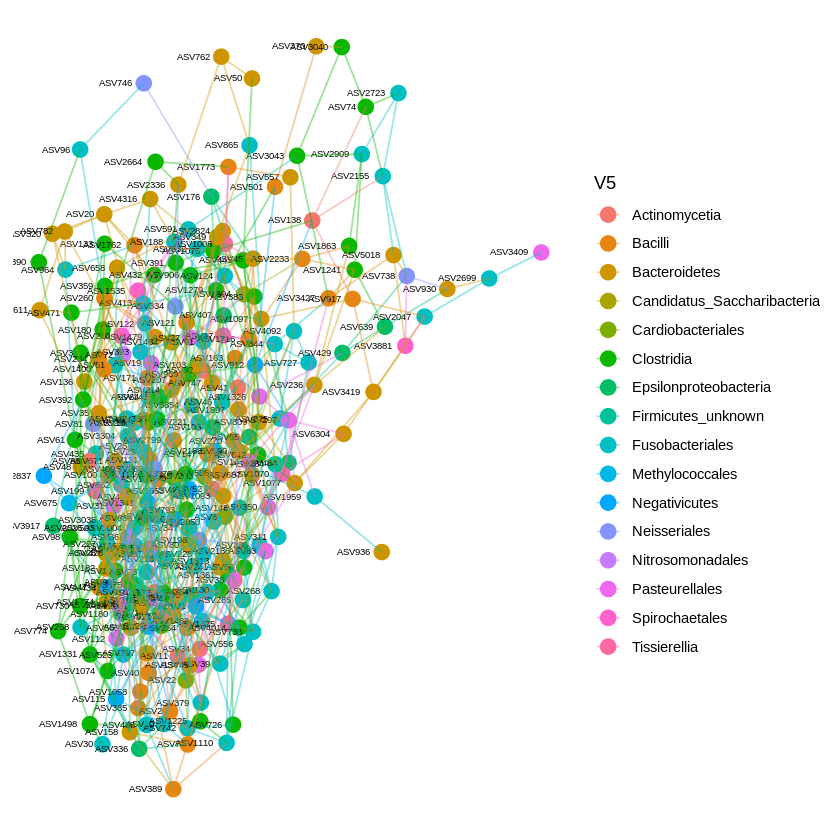

png 
  2

[1] "core network ASVs:  1"   "core network ASVs:  2"  
  [3] "core network ASVs:  3"   "core network ASVs:  4"  
  [5] "core network ASVs:  5"   "core network ASVs:  6"  
  [7] "core network ASVs:  7"   "core network ASVs:  8"  
  [9] "core network ASVs:  9"   "core network ASVs:  10" 
 [11] "core network ASVs:  11"  "core network ASVs:  12" 
 [13] "core network ASVs:  13"  "core network ASVs:  14" 
 [15] "core network ASVs:  15"  "core network ASVs:  16" 
 [17] "core network ASVs:  17"  "core network ASVs:  18" 
 [19] "core network ASVs:  19"  "core network ASVs:  20" 
 [21] "core network ASVs:  21"  "core network ASVs:  22" 
 [23] "core network ASVs:  23"  "core network ASVs:  24" 
 [25] "core network ASVs:  25"  "core network ASVs:  26" 
 [27] "core network ASVs:  27"  "core network ASVs:  28" 
 [29] "core network ASVs:  29"  "core network ASVs:  30" 
 [31] "core network ASVs:  31"  "core network ASVs:  32" 
 [33] "core network ASVs:  33"  "core network ASVs:  34" 
 [35] "core network ASVs:  35"  "core network ASVs:  36" 
 [37] "core network ASVs:  37"  "core network ASVs:  38" 
 [39] "core network ASVs:  39"  "core network ASVs:  40" 
 [41] "core network ASVs:  41"  "core network ASVs:  42" 
 [43] "core network ASVs:  43"  "core network ASVs:  44" 
 [45] "core network ASVs:  45"  "core network ASVs:  46" 
 [47] "core network ASVs:  47"  "core network ASVs:  48" 
 [49] "core network ASVs:  49"  "core network ASVs:  50" 
 [51] "core network ASVs:  51"  "core network ASVs:  52" 
 [53] "core network ASVs:  53"  "core network ASVs:  54" 
 [55] "core network ASVs:  55"  "core network ASVs:  56" 
 [57] "core network ASVs:  57"  "core network ASVs:  58" 
 [59] "core network ASVs:  59"  "core network ASVs:  60" 
 [61] "core network ASVs:  61"  "core network ASVs:  62" 
 [63] "core network ASVs:  63"  "core network ASVs:  64" 
 [65] "core network ASVs:  65"  "core network ASVs:  66" 
 [67] "core network ASVs:  67"  "core network ASVs:  68" 
 [69] "core network ASVs:  69"  "core network ASVs:  70" 
 [71] "core network ASVs:  71"  "core network ASVs:  72" 
 [73] "core network ASVs:  73"  "core network ASVs:  74" 
 [75] "core network ASVs:  75"  "core network ASVs:  76" 
 [77] "core network ASVs:  77"  "core network ASVs:  78" 
 [79] "core network ASVs:  79"  "core network ASVs:  80" 
 [81] "core network ASVs:  81"  "core network ASVs:  82" 
 [83] "core network ASVs:  83"  "core network ASVs:  84" 
 [85] "core network ASVs:  85"  "core network ASVs:  86" 
 [87] "core network ASVs:  87"  "core network ASVs:  88" 
 [89] "core network ASVs:  89"  "core network ASVs:  90" 
 [91] "core network ASVs:  91"  "core network ASVs:  92" 
 [93] "core network ASVs:  93"  "core network ASVs:  94" 
 [95] "core network ASVs:  95"  "core network ASVs:  96" 
 [97] "core network ASVs:  97"  "core network ASVs:  98" 
 [99] "core network ASVs:  99"  "core network ASVs:  100"
[101] "core network ASVs:  101" "core network ASVs:  102"
[103] "core network ASVs:  103" "core network ASVs:  104"
[105] "core network ASVs:  105" "core network ASVs:  106"
[107] "core network ASVs:  107" "core network ASVs:  108"
[109] "core network ASVs:  109" "core network ASVs:  110"
[111] "core network ASVs:  111" "core network ASVs:  112"
[113] "core network ASVs:  113" "core network ASVs:  114"
[115] "core network ASVs:  115" "core network ASVs:  116"
[117] "core network ASVs:  117" "core network ASVs:  118"
[119] "core network ASVs:  119" "core network ASVs:  120"
[121] "core network ASVs:  121" "core network ASVs:  122"
[123] "core network ASVs:  123" "core network ASVs:  124"
[125] "core network ASVs:  125" "core network ASVs:  126"
[127] "core network ASVs:  127" "core network ASVs:  128"
[129] "core network ASVs:  129" "core network ASVs:  130"
[131] "core network ASVs:  131" "core network ASVs:  132"
[133] "core network ASVs:  133" "core network ASVs:  134"
[135] "core network ASVs:  135" "core network ASVs:  136"
[137] "core network ASVs:  137" "core network ASVs:  138"


[1] "peripheral network ASVs:  "

ASV62     ASV87    ASV969    ASV924     ASV23   ASV3879   ASV2001    ASV144 
0.4515783 0.4552909 0.4837596 0.4846076 0.5743601 0.6308044 0.6477353 0.6764155 
   ASV107   ASV1341 
0.7114974 1.0000000

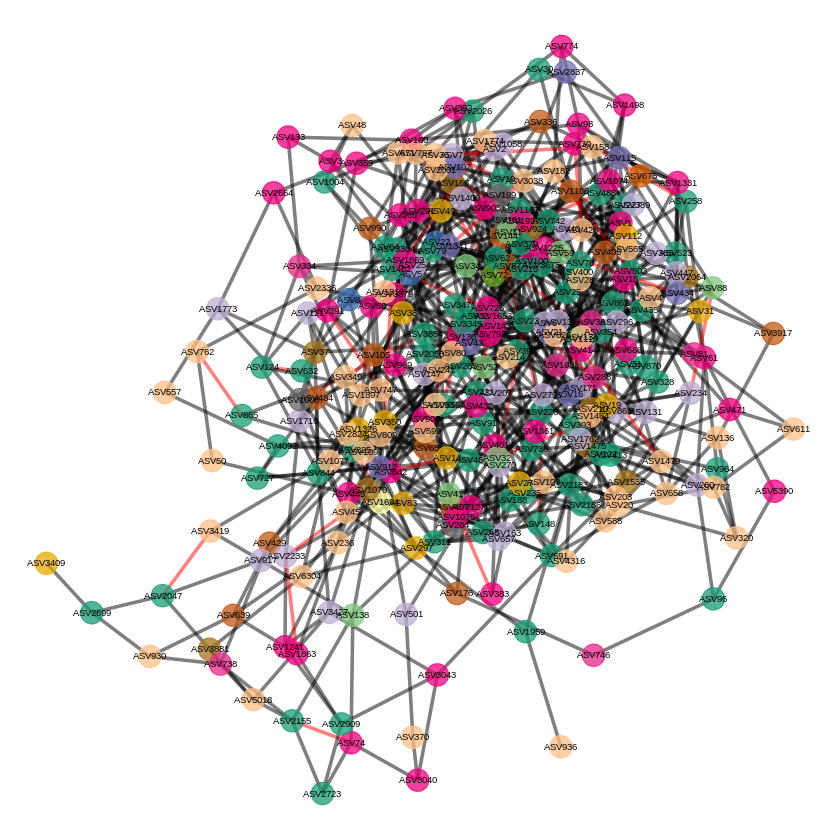

In [23]:
spiec.out <- spiec.easi(ps.dat.HI.CAPE, method="mb", lambda.min.ratio=1e-2, nlambda=20, pulsar.params=list(rep.num=100))
spiec.graph <- adj2igraph(getRefit(spiec.out), vertex.attr=list(name=taxa_names(ps.dat.HI.CAPE)))
paste("Total number of ASVs in graph: ", length(taxa_names(ps.dat.HI.CAPE)))
# save network
grph <- plot_network(spiec.graph, ps.dat.HI.CAPE, type='taxa', color="V5")
grph
pdf("img/network.HI.CAPE.pdf")
grph
dev.off()
#how many positive and negative edges inferred from network?
betaMat <- as.matrix(symBeta(getOptBeta(spiec.out)))
positive <- length(betaMat[betaMat>0])/2
paste("number of positive connections: ", positive)
negative <- length(betaMat[betaMat<0])/2
paste("number of negative connections: ", negative)
total <- length(betaMat[betaMat!=0])/2
paste("total number of connections: ", total)
# visualize network with pos and neg connections
asv.ids <- colnames(spiec.out[[1]]$data)
edges <- E(spiec.graph)
edge_cols <- ifelse(betaMat>0, 'black', 'red')[upper.tri(betaMat) & betaMat!=0]
E(spiec.graph)$color <- edge_cols

#How many nodes connected at specific rank
nb_nodes <- vcount(spiec.graph)
tax_table(ps.dat) <- tax_table(ps.dat)[,getrank]
asv_ids <- V(spiec.graph)$name
idx <- which(row.names(tax_table(ps.dat)) %in% asv_ids)
taxa <- as.character(tax_table(ps.dat)[,getrank])[idx]
ig2 <- asNetwork(spiec.graph)
network.vertex.names(ig2) <- taxa
net <- ig2
net %v% getrank <- as.character(taxa)
y <- col_vector74[1:nb_nodes]
names(y) <- levels(as.factor(taxa))

#Plot the network
grph <- ggnet2(net, color = getrank, alpha=0.75, palette = y, size = 6, edge.size=1, edge.color="color", edge.alpha = 0.5, label = asv_ids, label.size = 2) +theme(legend.position = "none")
grph
pdf("img/network.HI.CAPE_posneg.pdf")
grph
dev.off()

#write spiec-easi graph to file 
write.graph(spiec.graph, file="spieceasi.ncol.HI.CAPE.txt", format="ncol")

# kcore decomp
paste("core network ASVs: ", which(coreness(spiec.graph)>=2))
paste("peripheral network ASVs: ", which(coreness(spiec.graph)==0))

# eigenvalue centrality
tail(sort(igraph::eigen_centrality(spiec.graph)$vector), 10)
# save graph
spiec.graph.HICAPE <- spiec.graph

#### 4h. HUU CA-PE

Applying data transformations...

Selecting model with pulsar using stars...

Fitting final estimate with mb...

done



[1] "Total number of ASVs in graph:  270"

png 
  2

[1] "number of positive connections:  2565"

[1] "number of negative connections:  754"

[1] "total number of connections:  3319"

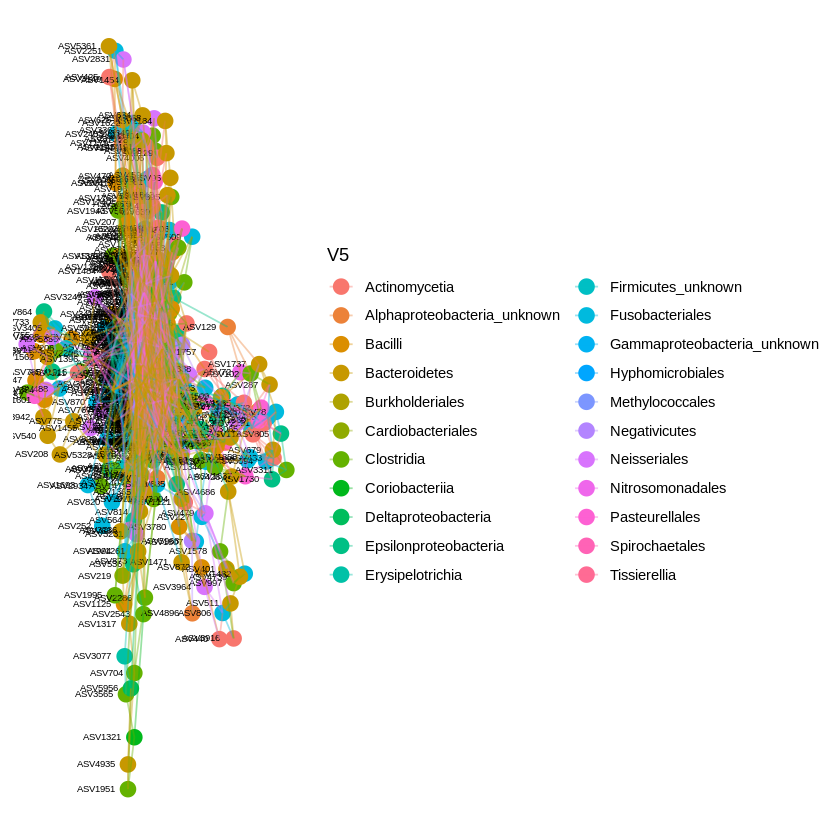

png 
  2

[1] "core network ASVs:  1"   "core network ASVs:  2"  
  [3] "core network ASVs:  3"   "core network ASVs:  4"  
  [5] "core network ASVs:  5"   "core network ASVs:  6"  
  [7] "core network ASVs:  7"   "core network ASVs:  8"  
  [9] "core network ASVs:  9"   "core network ASVs:  10" 
 [11] "core network ASVs:  11"  "core network ASVs:  12" 
 [13] "core network ASVs:  13"  "core network ASVs:  14" 
 [15] "core network ASVs:  15"  "core network ASVs:  16" 
 [17] "core network ASVs:  17"  "core network ASVs:  18" 
 [19] "core network ASVs:  19"  "core network ASVs:  20" 
 [21] "core network ASVs:  21"  "core network ASVs:  22" 
 [23] "core network ASVs:  23"  "core network ASVs:  24" 
 [25] "core network ASVs:  25"  "core network ASVs:  26" 
 [27] "core network ASVs:  27"  "core network ASVs:  28" 
 [29] "core network ASVs:  29"  "core network ASVs:  30" 
 [31] "core network ASVs:  31"  "core network ASVs:  32" 
 [33] "core network ASVs:  33"  "core network ASVs:  34" 
 [35] "core network ASVs:  35"  "core network ASVs:  36" 
 [37] "core network ASVs:  37"  "core network ASVs:  38" 
 [39] "core network ASVs:  39"  "core network ASVs:  40" 
 [41] "core network ASVs:  41"  "core network ASVs:  42" 
 [43] "core network ASVs:  43"  "core network ASVs:  44" 
 [45] "core network ASVs:  45"  "core network ASVs:  46" 
 [47] "core network ASVs:  47"  "core network ASVs:  48" 
 [49] "core network ASVs:  49"  "core network ASVs:  50" 
 [51] "core network ASVs:  51"  "core network ASVs:  52" 
 [53] "core network ASVs:  53"  "core network ASVs:  54" 
 [55] "core network ASVs:  55"  "core network ASVs:  56" 
 [57] "core network ASVs:  57"  "core network ASVs:  58" 
 [59] "core network ASVs:  59"  "core network ASVs:  60" 
 [61] "core network ASVs:  61"  "core network ASVs:  62" 
 [63] "core network ASVs:  63"  "core network ASVs:  64" 
 [65] "core network ASVs:  65"  "core network ASVs:  66" 
 [67] "core network ASVs:  67"  "core network ASVs:  68" 
 [69] "core network ASVs:  69"  "core network ASVs:  70" 
 [71] "core network ASVs:  71"  "core network ASVs:  72" 
 [73] "core network ASVs:  73"  "core network ASVs:  74" 
 [75] "core network ASVs:  75"  "core network ASVs:  76" 
 [77] "core network ASVs:  77"  "core network ASVs:  78" 
 [79] "core network ASVs:  79"  "core network ASVs:  80" 
 [81] "core network ASVs:  81"  "core network ASVs:  82" 
 [83] "core network ASVs:  83"  "core network ASVs:  84" 
 [85] "core network ASVs:  85"  "core network ASVs:  86" 
 [87] "core network ASVs:  87"  "core network ASVs:  88" 
 [89] "core network ASVs:  89"  "core network ASVs:  90" 
 [91] "core network ASVs:  91"  "core network ASVs:  92" 
 [93] "core network ASVs:  93"  "core network ASVs:  94" 
 [95] "core network ASVs:  95"  "core network ASVs:  96" 
 [97] "core network ASVs:  97"  "core network ASVs:  98" 
 [99] "core network ASVs:  99"  "core network ASVs:  100"
[101] "core network ASVs:  101" "core network ASVs:  102"
[103] "core network ASVs:  103" "core network ASVs:  104"
[105] "core network ASVs:  105" "core network ASVs:  106"
[107] "core network ASVs:  107" "core network ASVs:  108"
[109] "core network ASVs:  109" "core network ASVs:  110"
[111] "core network ASVs:  111" "core network ASVs:  112"
[113] "core network ASVs:  113" "core network ASVs:  114"
[115] "core network ASVs:  115" "core network ASVs:  116"
[117] "core network ASVs:  117" "core network ASVs:  118"
[119] "core network ASVs:  119" "core network ASVs:  120"
[121] "core network ASVs:  121" "core network ASVs:  122"
[123] "core network ASVs:  123" "core network ASVs:  124"
[125] "core network ASVs:  125" "core network ASVs:  126"
[127] "core network ASVs:  127" "core network ASVs:  128"
[129] "core network ASVs:  129" "core network ASVs:  130"
[131] "core network ASVs:  131" "core network ASVs:  132"
[133] "core network ASVs:  133" "core network ASVs:  134"
[135] "core network ASVs:  135" "core network ASVs:  136"
[137] "core network ASVs:  137" "core network ASVs:  138"


[1] "peripheral network ASVs:  "

ASV936   ASV3375   ASV3365    ASV281     ASV13    ASV369    ASV127     ASV75 
0.5389743 0.5436522 0.5475938 0.5493459 0.5731194 0.5782608 0.7642817 0.8667147 
  ASV2713    ASV379 
0.9191806 1.0000000

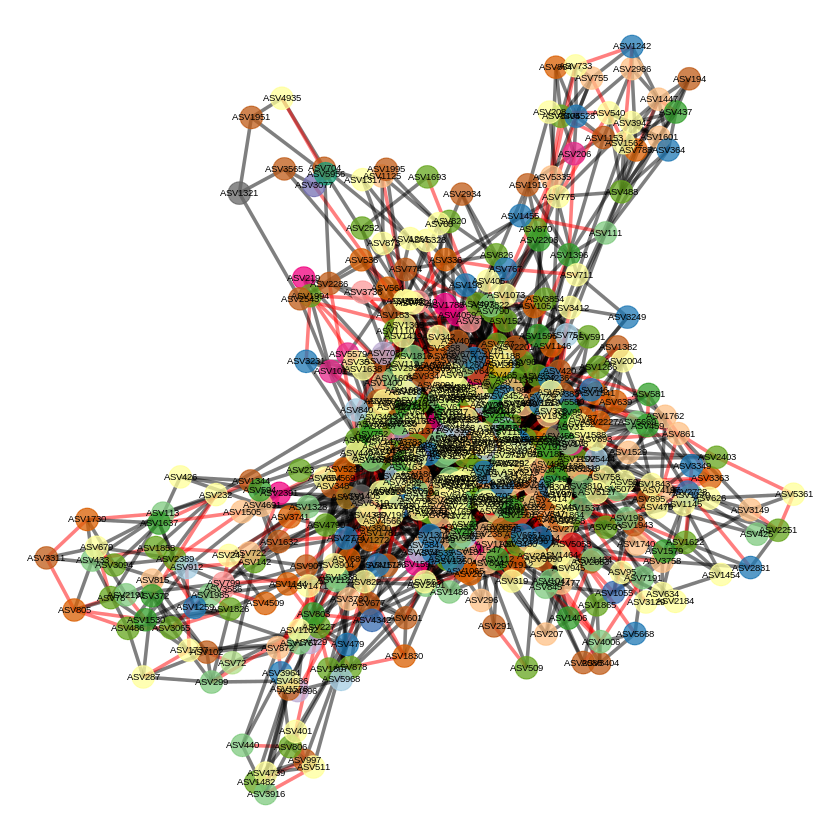

In [24]:
spiec.out <- spiec.easi(ps.dat.HUU.CAPE, method="mb", lambda.min.ratio=1e-2, nlambda=20, pulsar.params=list(rep.num=100))
spiec.graph <- adj2igraph(getRefit(spiec.out), vertex.attr=list(name=taxa_names(ps.dat.HUU.CAPE)))
paste("Total number of ASVs in graph: ", length(taxa_names(ps.dat.HUU.CAPD)))
# save network
grph <- plot_network(spiec.graph, ps.dat.HUU.CAPE, type='taxa', color="V5")
grph
pdf("img/network.HUU.CAPE.pdf")
grph
dev.off()
#how many positive and negative edges inferred from network?
betaMat <- as.matrix(symBeta(getOptBeta(spiec.out)))
positive <- length(betaMat[betaMat>0])/2
paste("number of positive connections: ", positive)
negative <- length(betaMat[betaMat<0])/2
paste("number of negative connections: ", negative)
total <- length(betaMat[betaMat!=0])/2
paste("total number of connections: ", total)
# visualize network with pos and neg connections
asv.ids <- colnames(spiec.out[[1]]$data)
edges <- E(spiec.graph)
edge_cols <- ifelse(betaMat>0, 'black', 'red')[upper.tri(betaMat) & betaMat!=0]
E(spiec.graph)$color <- edge_cols

#How many nodes connected at specific rank
nb_nodes <- vcount(spiec.graph)
tax_table(ps.dat) <- tax_table(ps.dat)[,getrank]
asv_ids <- V(spiec.graph)$name
idx <- which(row.names(tax_table(ps.dat)) %in% asv_ids)
taxa <- as.character(tax_table(ps.dat)[,getrank])[idx]
ig2 <- asNetwork(spiec.graph)
network.vertex.names(ig2) <- taxa
net <- ig2
net %v% getrank <- as.character(taxa)
y <- col_vector74[1:nb_nodes]
names(y) <- levels(as.factor(taxa))

#Plot the network
grph <- ggnet2(net, color = getrank, alpha=0.75, palette = y, size = 6, edge.size=1, edge.color="color", edge.alpha = 0.5, label = asv_ids, label.size = 2) +theme(legend.position = "none")
grph
pdf("img/network.HUU.CAPE_posneg.pdf")
grph
dev.off()

#write spiec-easi graph to file 
write.graph(spiec.graph, file="spieceasi.ncol.HUU.CAPE.txt", format="ncol")

# kcore decomp
paste("core network ASVs: ", which(coreness(spiec.graph)>=2))
paste("peripheral network ASVs: ", which(coreness(spiec.graph)==0))

# eigenvalue centrality
tail(sort(igraph::eigen_centrality(spiec.graph)$vector), 10)
# save graph
spiec.graph.HUUCAPE <- spiec.graph

#### 4i. HEU CA-PE network

In [ ]:
load(".RData") # for debugging

# Subsample ASVs to those found at least 3 times in 25% of samples (low sample number leads to too many ASVs post filtering for R not to crash)
# Results from this network taken with a grain of salt b/c of small sample size
## HEU CA-PE                               
ps.dat.HEU.CAPE <- subset_samples(ps.dat.noUS, study_group == "HEU" & aliquot_type == "CA-PE")
# filter low abundance taxa to simplify network building step (seen at least 3 times in 25% of samples)
ps.dat.HEU.CAPE <- filter_taxa(ps.dat.HEU.CAPE, function(x) sum(x > 3) > (0.25*length(x)), TRUE)
# generate network
spiec.out <- spiec.easi(ps.dat.HEU.CAPE, method="mb", lambda.min.ratio=1e-2, nlambda=20, pulsar.params=list(rep.num=100))
spiec.graph <- adj2igraph(getRefit(spiec.out), vertex.attr=list(name=taxa_names(ps.dat.HEU.CAPE)))
paste("Total number of ASVs in graph: ", length(taxa_names(ps.dat.HEU.CAPD)))
# save network
grph <- plot_network(spiec.graph, ps.dat.HEU.CAPE, type='taxa', color="V5")
grph
pdf("img/network.HEU.CAPE.pdf")
grph
dev.off()
#how many positive and negative edges inferred from network?
betaMat <- as.matrix(symBeta(getOptBeta(spiec.out)))
positive <- length(betaMat[betaMat>0])/2
paste("number of positive connections: ", positive)
negative <- length(betaMat[betaMat<0])/2
paste("number of negative connections: ", negative)
total <- length(betaMat[betaMat!=0])/2
paste("total number of connections: ", total)
# visualize network with pos and neg connections
asv.ids <- colnames(spiec.out[[1]]$data)
edges <- E(spiec.graph)
edge_cols <- ifelse(betaMat>0, 'black', 'red')[upper.tri(betaMat) & betaMat!=0]
E(spiec.graph)$color <- edge_cols

#How many nodes connected at specific rank
nb_nodes <- vcount(spiec.graph)
tax_table(ps.dat) <- tax_table(ps.dat)[,getrank]
asv_ids <- V(spiec.graph)$name
idx <- which(row.names(tax_table(ps.dat)) %in% asv_ids)
taxa <- as.character(tax_table(ps.dat)[,getrank])[idx]
ig2 <- asNetwork(spiec.graph)
network.vertex.names(ig2) <- taxa
net <- ig2
net %v% getrank <- as.character(taxa)
y <- col_vector74[1:nb_nodes]
names(y) <- levels(as.factor(taxa))

#Plot the network
grph <- ggnet2(net, color = getrank, alpha=0.75, palette = y, size = 6, edge.size=1, edge.color="color", edge.alpha = 0.5, label = asv_ids, label.size = 2) +theme(legend.position = "none")
grph
pdf("img/network.HEU.CAPE_posneg.pdf")
grph
dev.off()

#write spiec-easi graph to file 
write.graph(spiec.graph, file="spieceasi.ncol.HEU.CAPE.txt", format="ncol")

# kcore decomp
paste("core network ASVs: ", which(coreness(spiec.graph)>=2))
paste("peripheral network ASVs: ", which(coreness(spiec.graph)==0))

# eigenvalue centrality
tail(sort(igraph::eigen_centrality(spiec.graph)$vector), 10)
# save graph
spiec.graph.HEUCAPE <- spiec.graph

Applying data transformations...

Selecting model with pulsar using stars...



Save workspace

In [26]:
save.image()